## **Mounting my Gdrive**

In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [3]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

In [4]:
def load_data(test_size=0.25):
    x,y=[],[]
    for file in glob.glob('C:/Users/shatrohan/Downloads/data/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)

In [5]:
# Split the dataset

import time
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [6]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(3939, 1313)


In [7]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [8]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [9]:
# Predict for the test set
y_pred=model.predict(x_test)

In [10]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.74%


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.86      0.91      0.88       207
        calm       0.42      0.98      0.59        88
     disgust       0.93      0.72      0.81       157
     fearful       0.71      0.91      0.80       202
       happy       0.97      0.62      0.76       183
     neutral       1.00      0.84      0.92       154
         sad       0.97      0.63      0.76       184
   surprised       0.82      0.84      0.83       138

    accuracy                           0.80      1313
   macro avg       0.83      0.81      0.79      1313
weighted avg       0.86      0.80      0.81      1313



In [12]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[188   4   2   8   1   0   0   4]
 [  0  86   1   1   0   0   0   0]
 [  5  20 113  10   1   0   0   8]
 [  8   4   0 184   1   0   2   3]
 [ 11  35   2  16 114   0   0   5]
 [  3  17   1   0   0 130   2   1]
 [  1  29   0  33   1   0 116   4]
 [  3   9   3   7   0   0   0 116]]


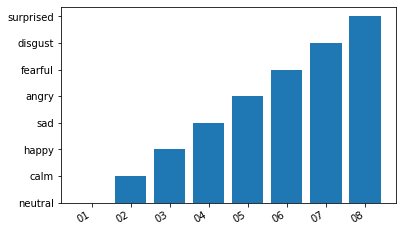

In [19]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.bar(emotions.keys(), emotions.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [17]:
import keras
from keras.utils import plot_model
from config import MODEL_DIR_PATH

restored_keras_model = keras.models.load_model(MODEL_DIR_PATH + 'Emotion_Voice_Detection_Model.h5')

plot_model(restored_keras_model, to_file='model.png')

ModuleNotFoundError: No module named 'config'

# Deep learning approach

In [13]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('C:/Users/shatrohan/Downloads/data/Actor_01/03-02-06-02-02-02-01.wav')

In [14]:
% pylab inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

UsageError: Line magic function `%` not found.


In [15]:
import time
import os
path = 'C:/Users/shatrohan/Downloads/data/Actor_*/*.wav'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
            X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
            file = int(file[7:8]) - 1 
            arr = mfccs, file
            lst.append(arr)
      # If the file is not valid, skip it
        except ValueError:
            continue

print("Data loaded , Loading time: %s seconds ---" % (time.time() - start_time))

Data loaded , Loading time: 0.0 seconds ---


In [18]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(zip(*lst))

ValueError: not enough values to unpack (expected 2, got 0)

In [17]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

NameError: name 'X' is not defined

In [ ]:
# Saving joblib files to not load them again with the loop above
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/content/drive/My Drive/Ravtess_model'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [ ]:
# Loading saved models
import joblib
X = joblib.load('/content/drive/My Drive/Ravtess_model/X.joblib')
y = joblib.load('/content/drive/My Drive/Ravtess_model/y.joblib')

# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X),y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

# cnn


In [19]:
import numpy as np
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

In [20]:
x_traincnn.shape, x_testcnn.shape

((3939, 180, 1), (1313, 180, 1))

In [21]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
model = Sequential()
optimizers.RMSprop()
model.add(Conv1D(64, 5,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

In [29]:
opt =tf.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0

In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [32]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=256, epochs=200, validation_data=(x_testcnn, y_test))

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'str'>"})